In [1]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.18 MiB | 19.15 MiB/s, done.
Resolving deltas: 100% (11307/11307), done.


In [2]:
%cd yolov5


/content/yolov5


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/731.7 MB 65.2 MB/s eta 0:00:10

In [ ]:
!python train.py --img 640 --batch 25 --epochs 150 --data /content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml


2024-03-13 13:43:57.148779: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 13:43:57.148859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 13:43:57.151224: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=25, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps,

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
from google.colab import files

# Upload the new ZIP file
uploaded = files.upload()


Saving best(1).pt to best(1).pt


In [13]:
import shutil

# Specify the source file path (the zip file containing best(1).pt)
zip_file_path = '/home/hitesh/Downloads/best(1).zip'

# Specify the destination directory path for extraction
destination_dir = '/content/yolov5/runs'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Extract the zip file
shutil.unpack_archive(zip_file_path, destination_dir, 'zip')

# List the files in the destination directory to verify extraction
extracted_files = os.listdir(destination_dir)
print(extracted_files)


ReadError: /home/hitesh/Downloads/best(1).zip is not a zip file

In [14]:







!python val.py --data /content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/data.yaml --weights /best.pt


val: data=/content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/data.yaml, weights=['/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
100% 755k/755k [00:00<00:00, 17.6MB/s]
val: Scanning /content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/valid/labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100% 159/159 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [01:33<00:00, 18.67s/it]
                   all        159       1336      0.893      0.764      0.863      0.468
Sp

In [15]:
!python detect.py --source /content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/test/images --weights /best.pt --conf 0.5 --iou 0.5 --img 640


detect: weights=['/best.pt'], source=/content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/82 /content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/test/images/frame0015_png.rf.89333753eb3df77b232a922629ff702a.jpg: 480x640 4 persons, 311.2ms
image 2/82 /content/drive/MyDrive/Internship_work/First_project_Yolov5_detection/dataset/test/images/frame0025_png.rf.76b3

In [21]:

!zip -r results.zip runs



  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/exp/ (stored 0%)
  adding: runs/detect/exp2/ (stored 0%)
  adding: runs/detect/exp2/image_00005145_0_png.rf.ffe706fa72f96602a219beb37ad335b4.jpg (deflated 3%)
  adding: runs/detect/exp2/image_00005118_0_png.rf.ce8fa4914588fc9bdd1e82038bfbc20f.jpg (deflated 3%)
  adding: runs/detect/exp2/image_00004992_0_png.rf.bf4cf0161962dd0a70f162fb92719c96.jpg (deflated 3%)
  adding: runs/detect/exp2/image_00004907_0_png.rf.c50f699d53f812c798e4b97d2d10c958.jpg (deflated 3%)
  adding: runs/detect/exp2/image_00005087_0_png.rf.bcd3b81c16fa0ce7721570e2df39088d.jpg (deflated 3%)
  adding: runs/detect/exp2/frame0067_png.rf.b3a9fd822c2005286f67578e79d650f0.jpg (deflated 3%)
  adding: runs/detect/exp2/frame0025_png.rf.76b3416905a737fcffaed24fcf01b4e6.jpg (deflated 2%)
  adding: runs/detect/exp2/image_00005360_0_png.rf.1fe141af793ffdfe0d828caaebb444b9.jpg (deflated 4%)
  adding: runs/detect/exp2/frame0071_png.rf.497cb37a9f7c

In [22]:
from google.colab import files
files.download('results.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

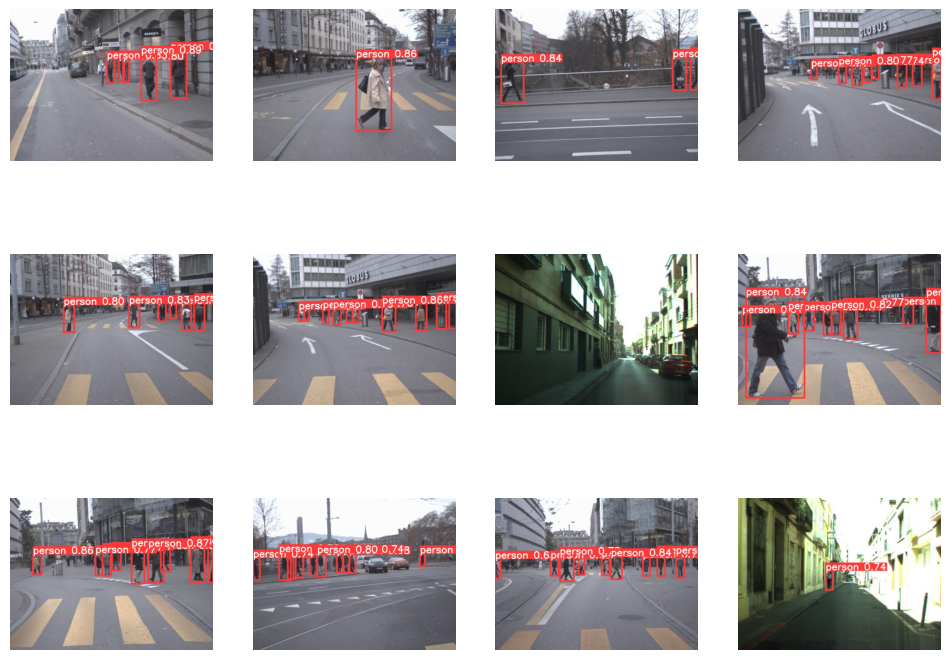

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

# Path to the folder containing the images
folder_path = "/content/yolov5/runs/detect/exp/"

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

# Select 12 random images
random_images = random.sample(image_files, 12)

# Create a subplot with 3 rows and 4 columns to display 12 images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

# Loop through the axes and random images to display each image
for i, ax in enumerate(axes.flat):
    # Read the image
    image = cv2.imread(random_images[i])
    # Convert BGR image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image on the current axis
    ax.imshow(image)
    ax.axis('off')  # Turn off axis numbers and ticks

plt.show()
